In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (7,1.65)
fontsize = 12
Fig.config(fontsize, figsize)

In [4]:
dataf = "../../data/linkedlist.csv"

In [5]:
!sha256sum $dataf

eb8267ee6c42f6c2e9dbb7580db386b65c813a74961ad6abd094ffce247e08ef  ../../data/linkedlist.csv


In [6]:
df = pd.read_csv(dataf, index_col=None)
df = df.set_index('workload')
df = df/10**9

In [7]:
df

,pmdk,snashot,msync
workload,,,
insert,0.444570,0.280422,185.355398
delete,0.439081,0.269353,124.655401
traverse,0.007857,0.001216,0.002194


In [8]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snashot,msync
workload,,,
insert,1.0,0.630771,416.931660
delete,1.0,0.613448,283.900648
traverse,1.0,0.154810,0.279239


Plot saved as `plots/pathfinding/linkedlist.png.png`

Plot saved as `plots/pathfinding/linkedlist.png.png`

Using pdfcrop on `plots/pathfinding/linkedlist.png.png` with command `pdfcrop plots/pathfinding/linkedlist.png.pdf plots/pathfinding/linkedlist.png.pdf`

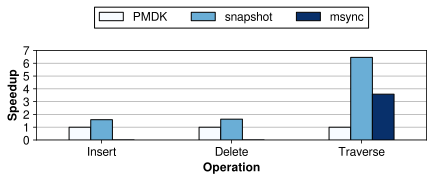

In [9]:
plt.rc('axes', unicode_minus=False)
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'freesans',
        'mathtext.fontset': 'stix',
    }
)

speedup = 1/df_norm
speedup = capitalize_index(speedup)
ax = rename_cols(speedup, {'pmdk': 'PMDK', 'snashot': 'snapshot', 'msync': 'msync'}).plot.bar(**Fig.get_kwargs(cmap='Blues'))
f = Fig(ax)
f.fmt_legend()
f.fmt_label(u'Operation', 'Speedup')
# f.add_bar_labels([False, True, True], fontsize=fontsize-5)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 10, 1))
ax.set_ylim((0,7))
save_fig('linkedlist.png')